# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [393]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.naive_bayes import MultinomialNB

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

## Adding price attribute to project_data dataframe from resources using merge function

In [3]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"}

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = sentance.lower().strip()
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    preprocessed_essays.append(sent)
    

100%|██████████| 109248/109248 [00:14<00:00, 7475.72it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations the materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills they also want learn games kids want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

In [19]:
project_data['clean_essay'] = preprocessed_essays

In [20]:
project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'],axis=1,inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

* Decontract project titles, remove line breaks and extra spaces, convert everything to lowercase and then remove all the stop words.

In [21]:
preprocessed_titles = []

for title in tqdm(project_data['project_title'].values):
    title = title.lower().strip()
    title = ' '.join(e for e in title.split() if e.lower() not in stopwords)
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    preprocessed_titles.append(title)

100%|██████████| 109248/109248 [00:01<00:00, 66467.06it/s]


In [22]:
project_data['clean_title'] = preprocessed_titles
project_data.drop(['project_title'],axis=1,inplace=True)

## Pre-processing teacher_prefix

In [23]:
#remove nan from teacher prefix:
#https://stackoverflow.com/questions/21011777/how-can-i-remove-nan-from-list-python-numpy
def remove_nan(prefix):
    if str(prefix)!='nan':
        pr = str(prefix)
        pr = re.sub("\\.","",pr) #remove dot from the end of prefix
        return pr
    return "none"

cleaned_teacher_prefix = project_data['teacher_prefix'].map(remove_nan)
project_data['clean_teacher_prefix'] = cleaned_teacher_prefix

In [24]:
project_data.drop(['teacher_prefix'],axis=1,inplace=True)

## Pre-process project_grade_category

* Clean the project grade categories: 
    * Convert     `Grades 3-5 ==> Grades_3_5`

In [25]:
def clean_project_grades(grade):
    grade = re.sub("\-","_",grade)
    grade = re.sub(" ","_",grade)
    return grade.strip()

clean_grades = project_data['project_grade_category'].map(clean_project_grades)
project_data['clean_grade_category'] = clean_grades

In [26]:
project_data.drop(['project_grade_category'],axis=1,inplace=True)

In [27]:
# Dropping all features we won't need going forward
project_data.drop(['project_resource_summary'],axis=1,inplace=True)
project_data.drop(['Unnamed: 0','teacher_id'],axis=1,inplace=True)

In [28]:
project_data.head(2)

id school_state project_submitted_datetime  \
0  p253737           IN        2016-12-05 13:43:57   
1  p258326           FL        2016-10-25 09:22:10   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                         clean_essay  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                                 clean_title clean_teacher_prefix  \
0  educational support english learners home                  Mrs   
1           wanted projector hungry learners                   Mr   

  clean_grade_category  
0        Grades_PreK_2  
1           Grades_6_8

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [29]:
#Separating features and label column
Y = project_data['project_is_approved']
X = project_data.drop(['project_is_approved','id'],axis=1)
print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (109248, 12)
Shape of Y:  (109248,)


In [30]:
#separating data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,stratify=Y)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (76473, 12)
Shape of Y_train:  (76473,)
Shape of X_test:  (32775, 12)
Shape of Y_test:  (32775,)


In [31]:
X_train.columns

Index(['school_state', 'project_submitted_datetime',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'clean_teacher_prefix', 'clean_grade_category'],
      dtype='object')

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

## 2.2.1 Encoding Categorical Features

**One hot encoding: clean_categories**

In [32]:
from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [33]:
# we use count vectorizer to convert the values into one 
vectorizer_category = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_category.fit(X_train['clean_categories'].values)

X_train_category_ohe = vectorizer_category.transform(X_train['clean_categories'].values)
X_test_category_ohe = vectorizer_category.transform(X_test['clean_categories'].values)

In [34]:
print(vectorizer_category.get_feature_names())
print("Shape of X_train after one hot encodig ",X_train_category_ohe.shape)
print("Shape of X_test after one hot encodig ",X_test_category_ohe.shape)
print("Print some random encoded categories: ")
print(X_train_category_ohe[0].toarray())
print(X_test_category_ohe[15].toarray())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of X_train after one hot encodig  (76473, 9)
Shape of X_test after one hot encodig  (32775, 9)
Print some random encoded categories: 
[[0 0 0 0 0 0 1 0 0]]
[[0 0 0 0 0 0 1 0 0]]


**One hot encoding: clean_subcategories**

In [35]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [36]:
# we use count vectorizer to convert the values into one 
vectorizer_subcategory = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategory.fit(X_train['clean_subcategories'].values)

X_train_subcategory_ohe = vectorizer_subcategory.transform(X_train['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer_subcategory.transform(X_test['clean_subcategories'].values)

In [37]:
print(vectorizer_subcategory.get_feature_names())
print("Shape of X_train subcategory after one hot encodig ",X_train_subcategory_ohe.shape)
print("Shape of X_test subcategory after one hot encodig ",X_test_subcategory_ohe.shape)
print("Print some random encoded categories: ")
print(X_train_subcategory_ohe[0].toarray())
print(X_test_subcategory_ohe[10].toarray())

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of X_train subcategory after one hot encodig  (76473, 30)
Shape of X_test subcategory after one hot encodig  (32775, 30)
Print some random encoded categories: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]]


**One hot encoding: school_state**

In [38]:
# create a vocabulary for states
unique_states = np.unique(X_train['school_state'].values)

vectorizer_state = CountVectorizer(vocabulary=unique_states,lowercase=False,binary=True)
vectorizer_state.fit(X_train['school_state'].values)

X_train_school_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_test_school_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

In [39]:
print(vectorizer_state.get_feature_names())
print("Shape of X_train school_state after one hot encodig ",X_train_school_state_ohe.shape)
print("Shape of X_test school_state after one hot encodig ",X_test_school_state_ohe.shape)
print("Print some random encoded school_state: ")
print(X_train_school_state_ohe[0].toarray())
print(X_test_school_state_ohe[15].toarray())

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of X_train school_state after one hot encodig  (76473, 51)
Shape of X_test school_state after one hot encodig  (32775, 51)
Print some random encoded school_state: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


**One hot encoding: teacher_prefix**

In [40]:
unique_teacher_prefix = np.unique(X_train['clean_teacher_prefix'])

vectorizer_teacher_prefix = CountVectorizer(vocabulary=unique_teacher_prefix,lowercase=False,binary=True)
vectorizer_teacher_prefix.fit(X_train['clean_teacher_prefix'].values)

X_train_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_train['clean_teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_test['clean_teacher_prefix'].values)

In [41]:
print(vectorizer_teacher_prefix.get_feature_names())
print("Shape of X_train clean_teacher_prefix after one hot encodig ",X_train_teacher_prefix_ohe.shape)
print("Shape of X_test clean_teacher_prefix after one hot encodig ",X_test_teacher_prefix_ohe.shape)
print("Print some random encoded clean_teacher_prefix: ")
print(X_train_teacher_prefix_ohe[0].toarray())
print(X_test_teacher_prefix_ohe[15].toarray())

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'none']
Shape of X_train clean_teacher_prefix after one hot encodig  (76473, 6)
Shape of X_test clean_teacher_prefix after one hot encodig  (32775, 6)
Print some random encoded clean_teacher_prefix: 
[[0 0 1 0 0 0]]
[[0 0 0 1 0 0]]


**One hot encoding: project_grade_category**

In [42]:
unique_grades = np.unique(X_train['clean_grade_category'])

vectorizer_grade = CountVectorizer(vocabulary=unique_grades,lowercase=False,binary=True)
vectorizer_grade.fit(X_train['clean_grade_category'].values)


X_train_grade_category_ohe = vectorizer_grade.transform(X_train['clean_grade_category'].values)
X_test_grade_category_ohe = vectorizer_grade.transform(X_test['clean_grade_category'].values)

In [43]:
print(vectorizer_grade.get_feature_names())
print("Shape of X_train clean_grade_category after one hot encodig ",X_train_grade_category_ohe.shape)
print("Shape of X_test clean_grade_category after one hot encodig ",X_test_grade_category_ohe.shape)
print("Print some random encoded clean_grade_category: ")
print(X_train_grade_category_ohe[0].toarray())
print(X_test_grade_category_ohe[15].toarray())

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of X_train clean_grade_category after one hot encodig  (76473, 4)
Shape of X_test clean_grade_category after one hot encodig  (32775, 4)
Print some random encoded clean_grade_category: 
[[1 0 0 0]]
[[1 0 0 0]]


## 2.2.2 Encoding Numerical features

**Normalizing Price**

In [44]:
price_vectorizer = preprocessing.Normalizer().fit(X_train['price'].values.reshape(1,-1))

In [45]:
X_train_price_normalized = price_vectorizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_normalized = price_vectorizer.transform(X_test['price'].values.reshape(1, -1))

In [46]:
X_train_price_normalized

array([[8.17538335e-04, 4.00903816e-05, 4.88652116e-03, ...,
        3.89220334e-04, 3.06718146e-03, 1.57765197e-03]])

In [47]:
X_test_price_normalized

array([[0.00099303, 0.00217137, 0.00291126, ..., 0.00264468, 0.00416806,
        0.00052604]])

**Normalize teacher_number_of_previously_posted_projects**

In [48]:
project_vectorizer = preprocessing.Normalizer().fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [49]:
X_train_normal_previous_project = project_vectorizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
X_test_normal_previous_project = project_vectorizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### 2.3.1 Bag of words : Essay

In [50]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay_bow = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer_essay_bow.fit(X_train['clean_essay'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [51]:
X_train_essay_bow = vectorizer_essay_bow.transform(X_train['clean_essay'])
X_test_essay_bow = vectorizer_essay_bow.transform(X_test['clean_essay'])

print("Shape of X_train_essay_bow ",X_train_essay_bow.shape)
print("Shape of X_test_essay_bow ",X_test_essay_bow.shape)

Shape of X_train_essay_bow  (76473, 5000)
Shape of X_test_essay_bow  (32775, 5000)


#### 2.3.2 Bag of words : Project Title

In [52]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_title_bow = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer_title_bow.fit(X_train['clean_title'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [53]:
X_train_title_bow = vectorizer_title_bow.transform(X_train['clean_title'])
X_test_title_bow = vectorizer_title_bow.transform(X_test['clean_title'])

print("Shape of X_train_title_bow ",X_train_title_bow.shape)
print("Shape of X_test_title_bow ",X_test_title_bow.shape)

Shape of X_train_title_bow  (76473, 4837)
Shape of X_test_title_bow  (32775, 4837)


#### 2.3.3 TFIDF vectorizer: Essay

In [54]:
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer_essay_tfidf.fit(X_train['clean_essay'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [55]:
X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['clean_essay'])
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['clean_essay'])

print("Shape of X_train_essay_tfidf ",X_train_essay_tfidf.shape)
print("Shape of X_test_essay_tfidf ",X_test_essay_tfidf.shape)

Shape of X_train_essay_tfidf  (76473, 5000)
Shape of X_test_essay_tfidf  (32775, 5000)


#### 2.3.4 TFIDF vectorizer: Project title

In [56]:
vectorizer_title_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer_title_tfidf.fit(X_train['clean_title'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [57]:
X_train_title_tfidf = vectorizer_title_tfidf.transform(X_train['clean_title'])
X_test_title_tfidf = vectorizer_title_tfidf.transform(X_test['clean_title'])

print("Shape of X_train_title_tfidf ",X_train_title_tfidf.shape)
print("Shape of X_test_title_tfidf",X_test_title_tfidf.shape)

Shape of X_train_title_tfidf  (76473, 4837)
Shape of X_test_title_tfidf (32775, 4837)


#### 2.3.5 Using Pretrained Models: Avg W2V : Essay

In [58]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [59]:
# average Word2Vec
def get_avg_w2v(corpus):
    avg_w2v_vectors=[]
    for sentence in tqdm(corpus): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

X_train_essay_avg_w2v_vectors = get_avg_w2v(X_train['clean_essay'])
X_test_essay_avg_w2v_vectors = get_avg_w2v(X_test['clean_essay'])

100%|██████████| 32775/32775 [00:10<00:00, 3041.38it/s]


In [60]:
print("Shape of X_train_essay_avg_w2v_vectors",len(X_train_essay_avg_w2v_vectors),len(X_train_essay_avg_w2v_vectors[0]))
print("Shape of X_test_essay_avg_w2v_vectors ",len(X_test_essay_avg_w2v_vectors),len(X_test_essay_avg_w2v_vectors[0]))

Shape of X_train_essay_avg_w2v_vectors 76473 300
Shape of X_test_essay_avg_w2v_vectors  32775 300


#### 2.3.6 Using Pretrained Models: Avg W2V : Project Title

In [61]:
X_train_title_avg_w2v_vectors = get_avg_w2v(X_train['clean_title'])
X_test_title_avg_w2v_vectors = get_avg_w2v(X_test['clean_title'])

100%|██████████| 32775/32775 [00:00<00:00, 58311.30it/s]


#### 2.3.7 Using Pretrained Models: TFIDF weighted W2V : Essay

In [62]:

def get_tfidf_weighted_w2v(corpus,dictionary,tfidf_words):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(corpus): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

In [63]:
dictionary = dict(zip(vectorizer_essay_tfidf.get_feature_names(), list(vectorizer_essay_tfidf.idf_)))
tfidf_words = set(vectorizer_essay_tfidf.get_feature_names())

X_train_essay_tfidf_w2v_vectors = get_tfidf_weighted_w2v(X_train['clean_essay'].values,dictionary,tfidf_words)
X_test_essay_tfidf_w2v_vectors = get_tfidf_weighted_w2v(X_test['clean_essay'].values,dictionary,tfidf_words)

100%|██████████| 32775/32775 [00:56<00:00, 578.26it/s]


In [64]:
print("Shape of X_train_essay_tfidf_w2v_vectors",len(X_train_essay_tfidf_w2v_vectors),len(X_train_essay_tfidf_w2v_vectors[0]))
print("Shape of X_test_essay_tfidf_w2v_vectors ",len(X_test_essay_tfidf_w2v_vectors),len(X_test_essay_tfidf_w2v_vectors[0]))

Shape of X_train_essay_tfidf_w2v_vectors 76473 300
Shape of X_test_essay_tfidf_w2v_vectors  32775 300


#### 2.3.7 Using Pretrained Models: TFIDF weighted W2V : Project Title

In [65]:
dictionary = dict(zip(vectorizer_title_tfidf.get_feature_names(), list(vectorizer_title_tfidf.idf_)))
tfidf_words = set(vectorizer_title_tfidf.get_feature_names())

X_train_title_tfidf_w2v_vectors = get_tfidf_weighted_w2v(X_train['clean_title'],dictionary,tfidf_words)
X_test_title_tfidf_w2v_vectors = get_tfidf_weighted_w2v(X_test['clean_title'],dictionary,tfidf_words)

print("Shape of X_train_title_tfidf_w2v_vectors",len(X_train_title_tfidf_w2v_vectors),len(X_train_title_tfidf_w2v_vectors[0]))
print("Shape of X_title_title_tfidf_w2v_vectors ",len(X_test_title_tfidf_w2v_vectors),len(X_test_title_tfidf_w2v_vectors[0]))

100%|██████████| 32775/32775 [00:01<00:00, 31593.30it/s]

Shape of X_train_title_tfidf_w2v_vectors 76473 300
Shape of X_title_title_tfidf_w2v_vectors  32775 300


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1  SET 1 : BOW

In [71]:
f1 = X_train_school_state_ohe
f2 = X_train_category_ohe
f3 = X_train_subcategory_ohe
f4 = X_train_grade_category_ohe
f5 = X_train_teacher_prefix_ohe
f6 = np.array(X_train_price_normalized).reshape(-1,1)
f7 = np.array(X_train_normal_previous_project).reshape(-1,1)

X_train_dt = hstack((f1,f2,f3,f4,f5,f6,f7,X_train_essay_bow,X_train_title_bow))
X_train_dt.shape

(76473, 9939)

In [72]:
f1 = X_test_school_state_ohe
f2 = X_test_category_ohe
f3 = X_test_subcategory_ohe
f4 = X_test_grade_category_ohe
f5 = X_test_teacher_prefix_ohe
f6 = np.array(X_test_price_normalized).reshape(-1,1)
f7 = np.array(X_test_normal_previous_project).reshape(-1,1)

X_test_dt = hstack((f1,f2,f3,f4,f5,f6,f7,X_test_essay_bow,X_test_title_bow))
X_test_dt.shape

(32775, 9939)

**Hyperparameter Tuning**

In [114]:
tune_parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

#Using GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tune_parameters, scoring = 'roc_auc', cv=3, return_train_score=True,n_jobs=-1, verbose=True)
model.fit(X_train_dt, Y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [134]:
results = pd.DataFrame.from_dict(model.cv_results_)
max_depths = []
min_samples = []
mean_cv_scores = []
mean_train_scores = []
for p in zip(results['params'], results['mean_test_score'], results['mean_train_score']):
    param_dict, score_test, score_train = p
    max_depth,min_sample = param_dict.values()
    max_depths.append(max_depth)
    min_samples.append(min_sample)
    mean_cv_scores.append(score_test)
    mean_train_scores.append(score_train)

In [136]:
df = pd.DataFrame({'max_depth':max_depths,'min_sample':min_samples,'mean_test_score':mean_cv_scores})
pivot = df.pivot(index = "max_depth", columns = "min_sample", values="mean_test_score")

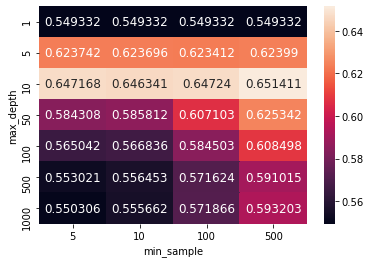

In [141]:
sns.heatmap(pivot,annot=True, annot_kws={"size": 12}, fmt='g')

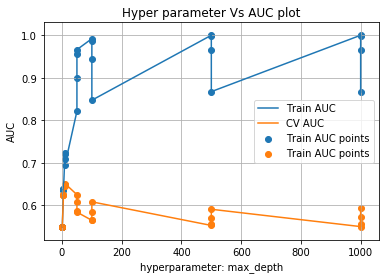

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.945838      0.102339         0.150862        0.027691   
1       0.944985      0.050369         0.169049        0.007639   
2       0.960690      0.050474         0.165803        0.009275   
3       0.983229      0.056244         0.153194        0.001948   
4       3.275126      0.050876         0.176872        0.006112   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                     100   
3               1                     500   
4               5                       5   

                                       params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 5}           0.551973   
1   {'max_depth': 1, 'min_samples_split': 10}           0.551973   
2  {'max_depth': 1, 'min_samples_split': 100}           0.551973   
3  {'max_depth': 1, 'min_samples_split': 500}           0.551973   
4    {'max_depth': 5, 'min_samples_split': 5}           0.620501   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.546615           0.549407         0.549332        0.002188   
1           0.546615           0.549407         0.549332        0.002188   
2           0.546615           0.549407         0.549332        0.002188   
3           0.546615           0.549407         0.549332        0.002188   
4           0.624093           0.626633         0.623742        0.002516   

   rank_test_score  split0_train_score  split1_train_score  \
0               25            0.548408            0.550199   
1               25            0.548408            0.550199   
2               25            0.548408            0.550199   
3               25            0.548408            0.550199   
4                7            0.634877            0.642687   

   split2_train_score  mean_train_score  std_train_score  
0            0.549691          0.549433         0.000754  
1            0.549691          0.549433         0.000754  
2            0.549691          0.549433         0.000754  
3            0.549691          0.549433         0.000754  
4            0.635670          0.637745         0.003510

In [146]:
auc_df_train = pd.DataFrame({'max_depth':max_depths,'train_auc':mean_train_scores})
auc_df_train = auc_df_train.sort_values(by='max_depth')

auc_df_cv = pd.DataFrame({'max_depth':max_depths,'cv_auc':mean_cv_scores})
auc_df_cv = auc_df_cv.sort_values(by='max_depth')

plt.plot(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC')
plt.plot(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='CV AUC')

plt.scatter(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC points')
plt.scatter(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='Train AUC points')


plt.legend()
plt.xlabel("hyperparameter: max_depth")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [147]:
model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Training the model on optimal value of parameters: max_depth=10 and min_samples_split=500**

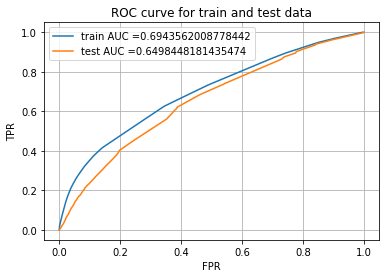

In [148]:
dt_bow = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=500)
dt_bow.fit(X_train_dt,Y_train)

y_train_pred = dt_bow.predict_proba(X_train_dt)
y_test_pred = dt_bow.predict_proba(X_test_dt)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Confusion Matrix**

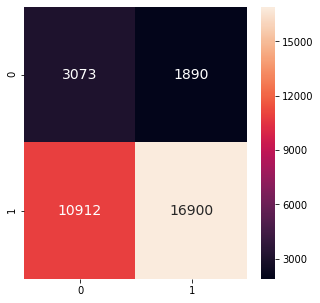

In [192]:
y_test_predict = dt_bow.predict(X_test_dt)

results = confusion_matrix(Y_test, y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')

**Analysis of False Positive Data points**

In [223]:
from wordcloud import WordCloud

In [213]:
fp_df = X_test.reset_index(drop=True)
fp_df['y'] = Y_test.values
fp_df['y_hat'] = y_test_predict
fp_df = fp_df.loc[(fp_df['y']==0) & (fp_df['y_hat']==1)]

In [221]:
fp_bow_essays = fp_df['clean_essay'].values

**Creating a word cloud of essays**

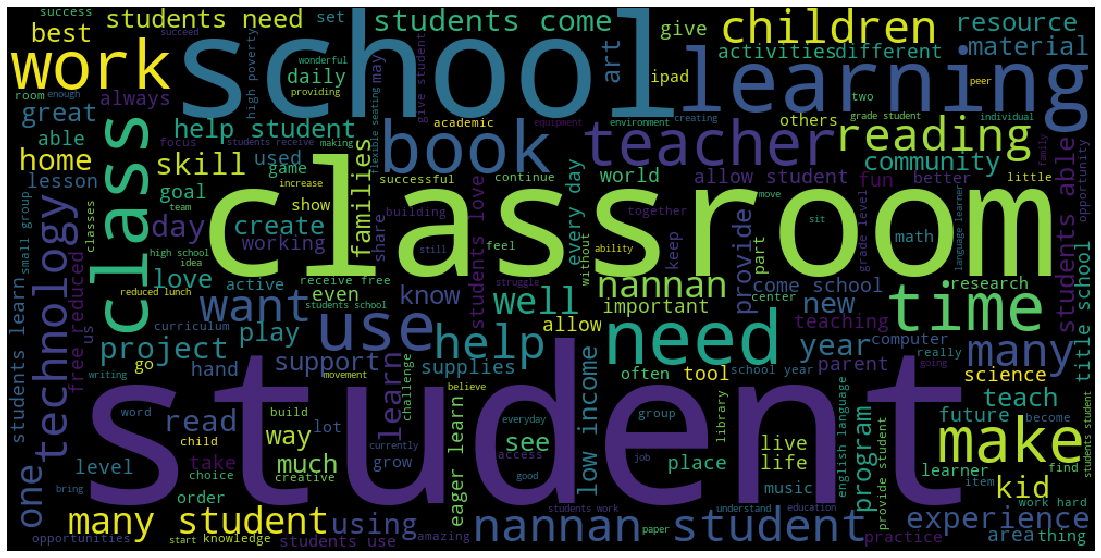

In [226]:
unique_string=(" ").join(fp_bow_essays)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

**Boxplot of price**

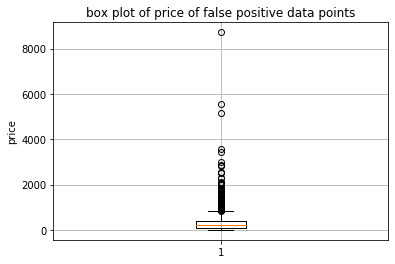

In [241]:
fp_prices_bow = fp_df['price']
plt.boxplot(fp_prices_bow)
plt.grid()
plt.ylabel("price")
plt.title("box plot of price of false positive data points")
plt.show()

**Conclusion**

* Most of the project which were actually rejected but predicted as positive have price less tha $500.


* Only a very few rejected projects have very high price.

**PDF of previous projects**

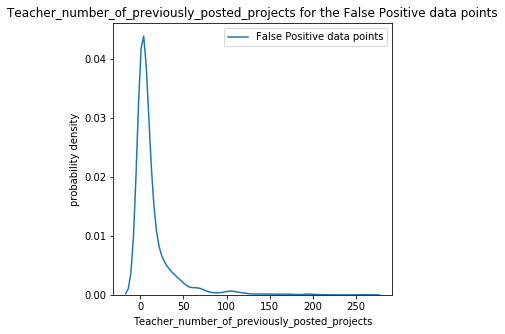

In [242]:
plt.figure(figsize=(5,5))
sns.distplot(fp_df['teacher_number_of_previously_posted_projects'].values, hist=False, label="False Positive data points")
plt.title('Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability density')
plt.legend()
plt.show()

**Conclusion:**

* The previously posted projects between 0-25 have maximum probability of being classified as false positive.

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [166]:
bow_feature_names = []
for name in vectorizer_state.get_feature_names():
    bow_feature_names.append(name)
for name in vectorizer_category.get_feature_names():
    bow_feature_names.append(name)
for name in vectorizer_subcategory.get_feature_names():
    bow_feature_names.append(name)
for name in vectorizer_grade.get_feature_names():
    bow_feature_names.append(name)
for name in vectorizer_teacher_prefix.get_feature_names():
    bow_feature_names.append(name)
bow_feature_names.append("price")
bow_feature_names.append("teacher_number_of_previous_project")

for name in vectorizer_essay_bow.get_feature_names():
    bow_feature_names.append(name)
for name in vectorizer_title_bow.get_feature_names():
    bow_feature_names.append(name)

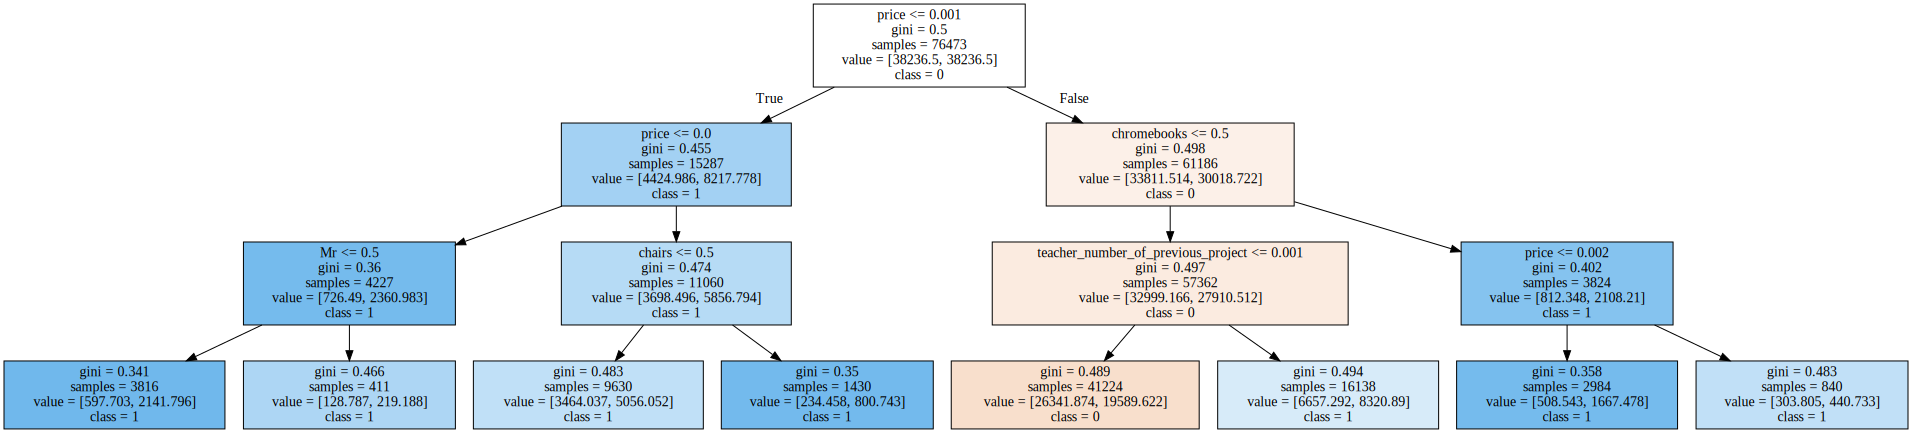

In [178]:
dt_bow_viz = DecisionTreeClassifier(class_weight='balanced',max_depth=3,min_samples_split=500)
dt_bow_viz.fit(X_train_dt,Y_train)
graph = Source(tree.export_graphviz(dt_bow_viz, out_file=None
   , feature_names=bow_feature_names, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [179]:
# from IPython.display import Image  
# graph = tree.export_graphviz(dt_bow, out_file=None
#    , feature_names=bow_feature_names, class_names=['0', '1'] 
#    , filled = True)
# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data) 
# # Show graph
# Image(graph.create_png())
# # Create PNG
# graph.write_png("DT_BOW.png")

### 2.4.2  SET 2 : TFIDF

In [227]:
f1 = X_train_school_state_ohe
f2 = X_train_category_ohe
f3 = X_train_subcategory_ohe
f4 = X_train_grade_category_ohe
f5 = X_train_teacher_prefix_ohe
f6 = np.array(X_train_price_normalized).reshape(-1,1)
f7 = np.array(X_train_normal_previous_project).reshape(-1,1)

X_train_tfidf = hstack((f1,f2,f3,f4,f5,f6,f7,X_train_essay_tfidf,X_train_title_tfidf))
X_train_tfidf.shape

(76473, 9939)

In [228]:
f1 = X_test_school_state_ohe
f2 = X_test_category_ohe
f3 = X_test_subcategory_ohe
f4 = X_test_grade_category_ohe
f5 = X_test_teacher_prefix_ohe
f6 = X_test_price_normalized.reshape(-1,1)
f7 = X_test_normal_previous_project.reshape(-1,1)

X_test_tfidf = hstack((f1,f2,f3,f4,f5,f6,f7,X_test_essay_tfidf,X_test_title_tfidf))
X_test_tfidf.shape

(32775, 9939)

**Hyperparameter Tuning**

In [229]:
tune_parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

#Using GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tune_parameters, scoring = 'roc_auc', cv=3, return_train_score=True,n_jobs=-1, verbose=True)
model.fit(X_train_tfidf, Y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [230]:
results = pd.DataFrame.from_dict(model.cv_results_)
max_depths = []
min_samples = []
mean_cv_scores = []
mean_train_scores = []
for p in zip(results['params'], results['mean_test_score'], results['mean_train_score']):
    param_dict, score_test, score_train = p
    max_depth,min_sample = param_dict.values()
    max_depths.append(max_depth)
    min_samples.append(min_sample)
    mean_cv_scores.append(score_test)
    mean_train_scores.append(score_train)

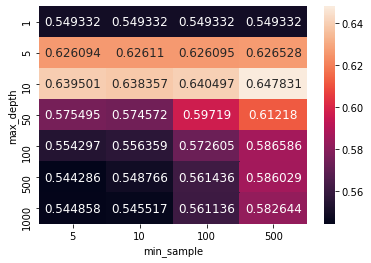

In [231]:
df = pd.DataFrame({'max_depth':max_depths,'min_sample':min_samples,'mean_test_score':mean_cv_scores})
pivot = df.pivot(index = "max_depth", columns = "min_sample", values="mean_test_score")
sns.heatmap(pivot,annot=True, annot_kws={"size": 12}, fmt='g')

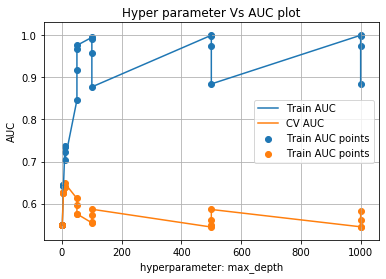

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.185698      0.219209         0.167770        0.010508   
1       2.307535      0.050574         0.163200        0.011208   
2       2.322602      0.029638         0.168274        0.006337   
3       2.313034      0.137224         0.166023        0.007770   
4       9.346741      0.201844         0.180907        0.006573   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                     100   
3               1                     500   
4               5                       5   

                                       params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 5}           0.551973   
1   {'max_depth': 1, 'min_samples_split': 10}           0.551973   
2  {'max_depth': 1, 'min_samples_split': 100}           0.551973   
3  {'max_depth': 1, 'min_samples_split': 500}           0.551973   
4    {'max_depth': 5, 'min_samples_split': 5}           0.623441   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.546615           0.549407         0.549332        0.002188   
1           0.546615           0.549407         0.549332        0.002188   
2           0.546615           0.549407         0.549332        0.002188   
3           0.546615           0.549407         0.549332        0.002188   
4           0.624349           0.630491         0.626094        0.003131   

   rank_test_score  split0_train_score  split1_train_score  \
0               21            0.548408            0.550199   
1               21            0.548408            0.550199   
2               21            0.548408            0.550199   
3               21            0.548408            0.550199   
4                8            0.641326            0.647400   

   split2_train_score  mean_train_score  std_train_score  
0            0.549691          0.549433         0.000754  
1            0.549691          0.549433         0.000754  
2            0.549691          0.549433         0.000754  
3            0.549691          0.549433         0.000754  
4            0.644118          0.644281         0.002483

In [232]:
auc_df_train = pd.DataFrame({'max_depth':max_depths,'train_auc':mean_train_scores})
auc_df_train = auc_df_train.sort_values(by='max_depth')

auc_df_cv = pd.DataFrame({'max_depth':max_depths,'cv_auc':mean_cv_scores})
auc_df_cv = auc_df_cv.sort_values(by='max_depth')

plt.plot(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC')
plt.plot(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='CV AUC')

plt.scatter(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC points')
plt.scatter(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='Train AUC points')


plt.legend()
plt.xlabel("hyperparameter: max_depth")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [233]:
model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Training the model on the most optimal value of max_depth=10,min_samples_split=500**

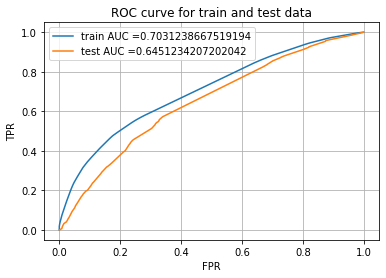

In [234]:
dt_tfidf = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=500)
dt_tfidf.fit(X_train_tfidf,Y_train)

y_train_pred = dt_tfidf.predict_proba(X_train_tfidf)
y_test_pred = dt_tfidf.predict_proba(X_test_tfidf)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Confusion Matrix**

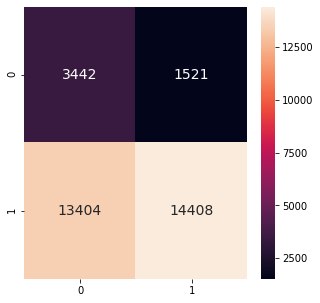

In [235]:
y_test_predict = dt_tfidf.predict(X_test_tfidf)

results = confusion_matrix(Y_test, y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')

**Analysis of False Positive**

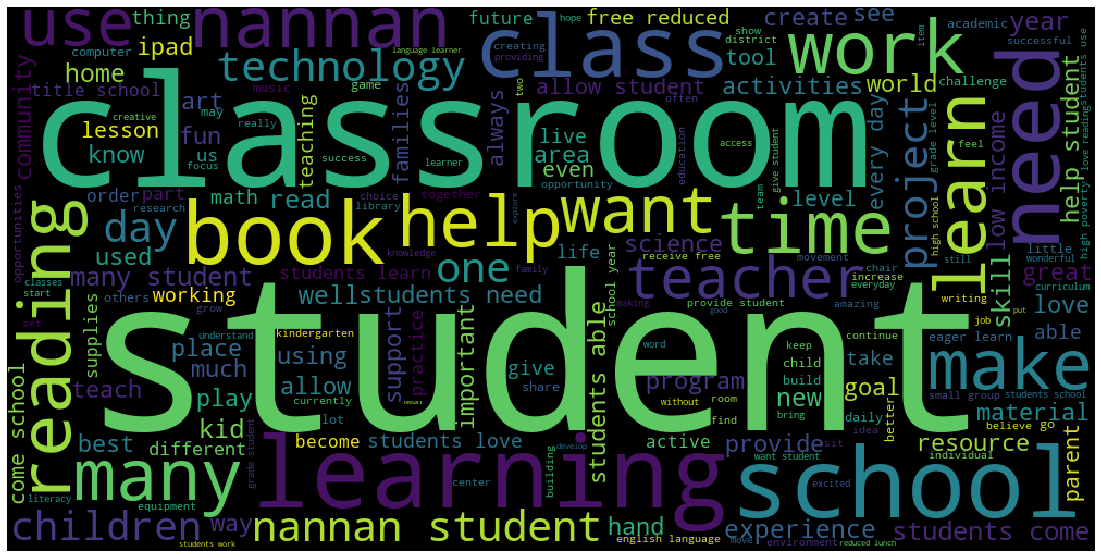

In [244]:
fp_df_tfidf = X_test.reset_index(drop=True)
fp_df_tfidf['y'] = Y_test.values
fp_df_tfidf['y_hat'] = y_test_predict
fp_df_tfidf = fp_df_tfidf.loc[(fp_df_tfidf['y']==0) & (fp_df_tfidf['y_hat']==1)]

unique_string=(" ").join(fp_df_tfidf['clean_essay'].values)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

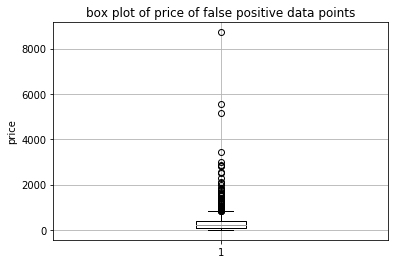

In [246]:
plt.boxplot(fp_df_tfidf['price'])
plt.grid()
plt.ylabel("price")
plt.title("box plot of price of false positive data points")
plt.show()

**Conclusion:** 

* Box plot of false positive price of bow and tfidf are almost identical.

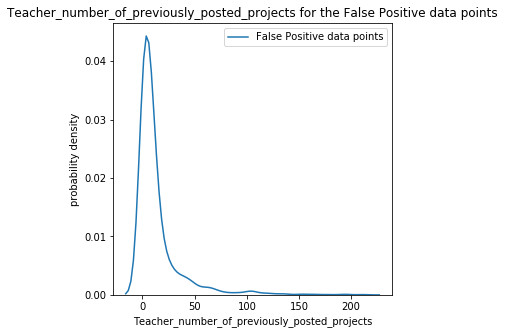

In [247]:
plt.figure(figsize=(5,5))
sns.distplot(fp_df_tfidf['teacher_number_of_previously_posted_projects'].values, hist=False, label="False Positive data points")
plt.title('Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability density')
plt.legend()
plt.show()

**Conclusion:**

* This distribution is similar to BOW and most false positive previously posted project lie between 0-25.

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

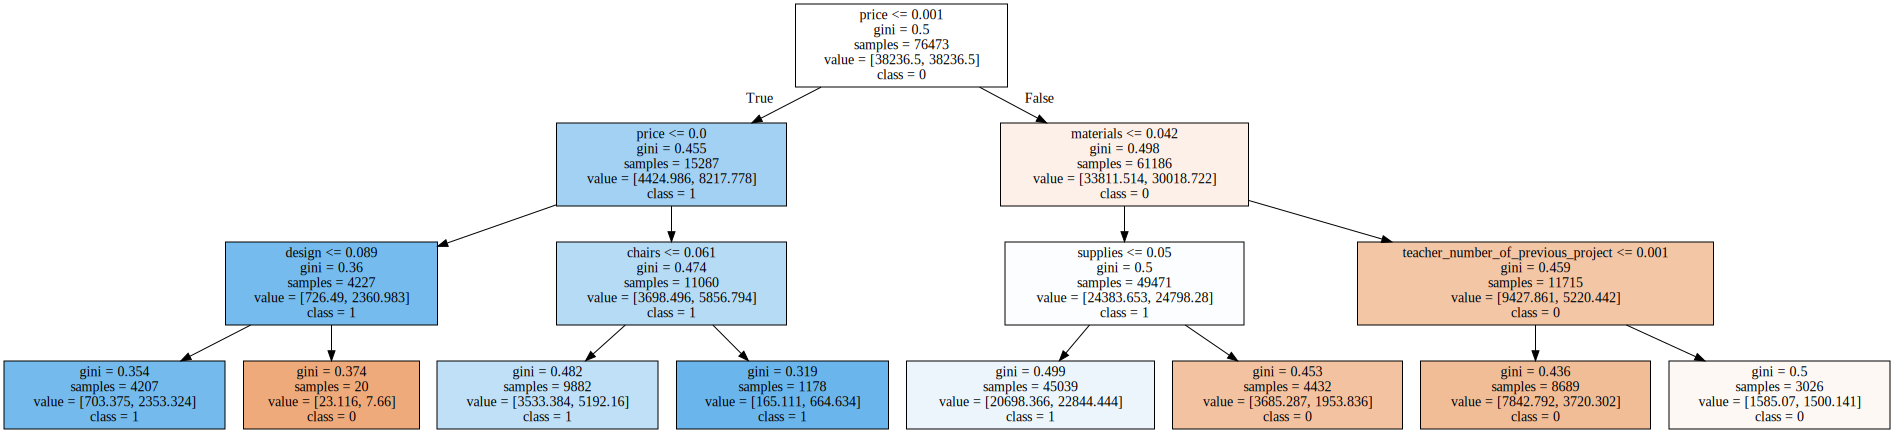

In [248]:
tfidf_feature_names = []
for name in vectorizer_state.get_feature_names():
    tfidf_feature_names.append(name)
for name in vectorizer_category.get_feature_names():
    tfidf_feature_names.append(name)
for name in vectorizer_subcategory.get_feature_names():
    tfidf_feature_names.append(name)
for name in vectorizer_grade.get_feature_names():
    tfidf_feature_names.append(name)
for name in vectorizer_teacher_prefix.get_feature_names():
    tfidf_feature_names.append(name)
tfidf_feature_names.append("price")
tfidf_feature_names.append("teacher_number_of_previous_project")

for name in vectorizer_essay_tfidf.get_feature_names():
    tfidf_feature_names.append(name)
for name in vectorizer_title_tfidf.get_feature_names():
    tfidf_feature_names.append(name)
    
dt_tfidf_viz = DecisionTreeClassifier(class_weight='balanced',max_depth=3,min_samples_split=500)
dt_tfidf_viz.fit(X_train_tfidf,Y_train)
graph = Source(tree.export_graphviz(dt_tfidf_viz, out_file=None
   , feature_names=tfidf_feature_names, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

### 2.4.3  SET 3 : W2Vec

In [249]:
f1 = X_train_school_state_ohe
f2 = X_train_category_ohe
f3 = X_train_subcategory_ohe
f4 = X_train_grade_category_ohe
f5 = X_train_teacher_prefix_ohe
f6 = np.array(X_train_price_normalized).reshape(-1,1)
f7 = np.array(X_train_normal_previous_project).reshape(-1,1)

X_train_w2v = hstack((f1,f2,f3,f4,f5,f6,f7,X_train_essay_avg_w2v_vectors,X_train_title_avg_w2v_vectors))
X_train_w2v.shape

(76473, 702)

In [250]:
f1 = X_test_school_state_ohe
f2 = X_test_category_ohe
f3 = X_test_subcategory_ohe
f4 = X_test_grade_category_ohe
f5 = X_test_teacher_prefix_ohe
f6 = X_test_price_normalized.reshape(-1,1)
f7 = X_test_normal_previous_project.reshape(-1,1)

X_test_w2v = hstack((f1,f2,f3,f4,f5,f6,f7,X_test_essay_avg_w2v_vectors,X_test_title_avg_w2v_vectors))
X_test_w2v.shape

(32775, 702)

**Hyperparameter Tuning**

In [251]:
tune_parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

#Using GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tune_parameters, scoring = 'roc_auc', cv=3, return_train_score=True,n_jobs=-1, verbose=True)
model.fit(X_train_w2v, Y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 15.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

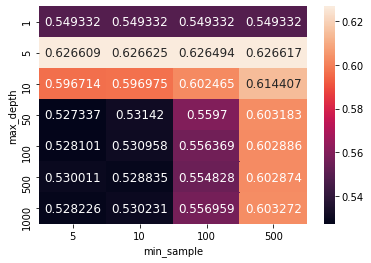

In [252]:
results = pd.DataFrame.from_dict(model.cv_results_)
max_depths = []
min_samples = []
mean_cv_scores = []
mean_train_scores = []
for p in zip(results['params'], results['mean_test_score'], results['mean_train_score']):
    param_dict, score_test, score_train = p
    max_depth,min_sample = param_dict.values()
    max_depths.append(max_depth)
    min_samples.append(min_sample)
    mean_cv_scores.append(score_test)
    mean_train_scores.append(score_train)

df = pd.DataFrame({'max_depth':max_depths,'min_sample':min_samples,'mean_test_score':mean_cv_scores})
pivot = df.pivot(index = "max_depth", columns = "min_sample", values="mean_test_score")
sns.heatmap(pivot,annot=True, annot_kws={"size": 12}, fmt='g')

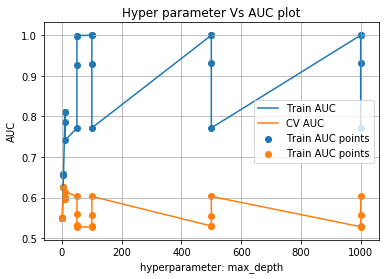

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      19.405422      0.154280         0.810844        0.004654   
1      19.499704      0.317155         0.826448        0.017091   
2      19.533478      0.118607         0.820223        0.005071   
3      19.440878      0.432694         0.829825        0.020909   
4      51.240497      0.215427         0.814442        0.007202   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                     100   
3               1                     500   
4               5                       5   

                                       params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 5}           0.551973   
1   {'max_depth': 1, 'min_samples_split': 10}           0.551973   
2  {'max_depth': 1, 'min_samples_split': 100}           0.551973   
3  {'max_depth': 1, 'min_samples_split': 500}           0.551973   
4    {'max_depth': 5, 'min_samples_split': 5}           0.622838   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.546615           0.549407         0.549332        0.002188   
1           0.546615           0.549407         0.549332        0.002188   
2           0.546615           0.549407         0.549332        0.002188   
3           0.546615           0.549407         0.549332        0.002188   
4           0.621420           0.635570         0.626609        0.006363   

   rank_test_score  split0_train_score  split1_train_score  \
0               17            0.548408            0.550199   
1               17            0.548408            0.550199   
2               17            0.548408            0.550199   
3               17            0.548408            0.550199   
4                3            0.654857            0.658798   

   split2_train_score  mean_train_score  std_train_score  
0            0.549691          0.549433         0.000754  
1            0.549691          0.549433         0.000754  
2            0.549691          0.549433         0.000754  
3            0.549691          0.549433         0.000754  
4            0.656949          0.656868         0.001610

In [253]:
auc_df_train = pd.DataFrame({'max_depth':max_depths,'train_auc':mean_train_scores})
auc_df_train = auc_df_train.sort_values(by='max_depth')

auc_df_cv = pd.DataFrame({'max_depth':max_depths,'cv_auc':mean_cv_scores})
auc_df_cv = auc_df_cv.sort_values(by='max_depth')

plt.plot(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC')
plt.plot(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='CV AUC')

plt.scatter(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC points')
plt.scatter(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='Train AUC points')


plt.legend()
plt.xlabel("hyperparameter: max_depth")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [254]:
model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Training model on the optimal hyperparameters: max_depth=5,min_samples_split=10**

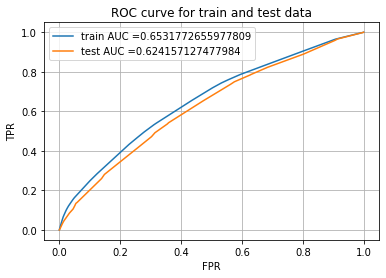

In [255]:
dt_w2v = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=10)
dt_w2v.fit(X_train_w2v,Y_train)

y_train_pred = dt_w2v.predict_proba(X_train_w2v)
y_test_pred = dt_w2v.predict_proba(X_test_w2v)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Confusion Matrix**

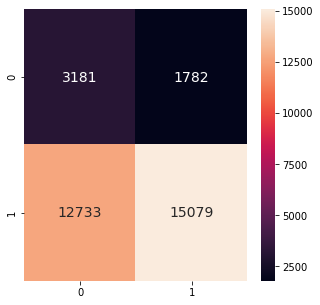

In [256]:
y_test_predict = dt_w2v.predict(X_test_w2v)

results = confusion_matrix(Y_test, y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')

**Analysis of False Positive**

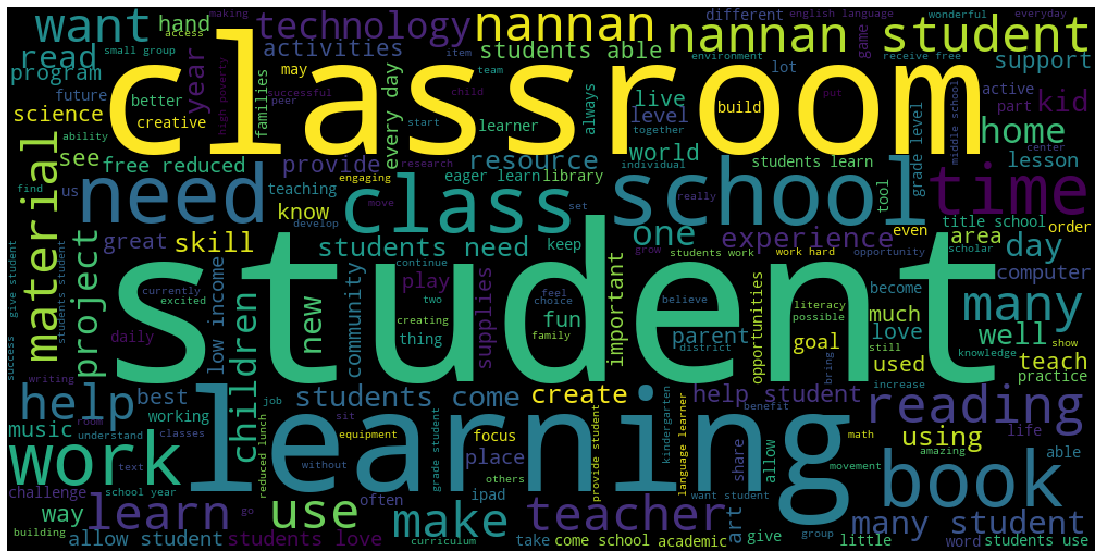

In [257]:
fp_df_w2v = X_test.reset_index(drop=True)
fp_df_w2v['y'] = Y_test.values
fp_df_w2v['y_hat'] = y_test_predict
fp_df_w2v = fp_df_w2v.loc[(fp_df_w2v['y']==0) & (fp_df_w2v['y_hat']==1)]

unique_string=(" ").join(fp_df_w2v['clean_essay'].values)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

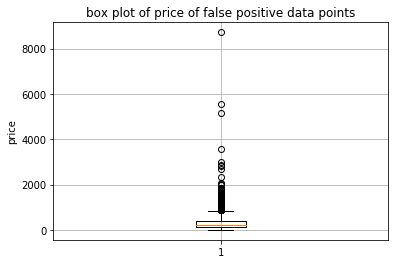

In [258]:
plt.boxplot(fp_df_w2v['price'])
plt.grid()
plt.ylabel("price")
plt.title("box plot of price of false positive data points")
plt.show()

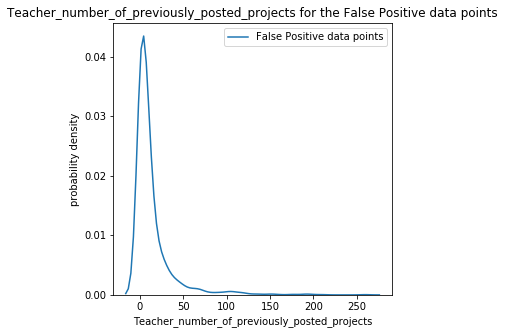

In [259]:
plt.figure(figsize=(5,5))
sns.distplot(fp_df_w2v['teacher_number_of_previously_posted_projects'].values, hist=False, label="False Positive data points")
plt.title('Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability density')
plt.legend()
plt.show()

**Conclusion:**

* The pdf of previous projects and box plot of price are similar to the ones obtained in BOW and TFIDF vectorization.

### 2.4.4  SET 4 : TFIDF-weighted W2Vec

In [260]:
f1 = X_train_school_state_ohe
f2 = X_train_category_ohe
f3 = X_train_subcategory_ohe
f4 = X_train_grade_category_ohe
f5 = X_train_teacher_prefix_ohe
f6 = np.array(X_train_price_normalized).reshape(-1,1)
f7 = np.array(X_train_normal_previous_project).reshape(-1,1)

X_train_tfidf_w2v = hstack((f1,f2,f3,f4,f5,f6,f7,X_train_essay_tfidf_w2v_vectors,X_train_title_tfidf_w2v_vectors))
X_train_tfidf_w2v.shape

(76473, 702)

In [261]:
f1 = X_test_school_state_ohe
f2 = X_test_category_ohe
f3 = X_test_subcategory_ohe
f4 = X_test_grade_category_ohe
f5 = X_test_teacher_prefix_ohe
f6 = X_test_price_normalized.reshape(-1,1)
f7 = X_test_normal_previous_project.reshape(-1,1)

X_test_tfidf_w2v = hstack((f1,f2,f3,f4,f5,f6,f7,X_test_essay_tfidf_w2v_vectors,X_test_title_tfidf_w2v_vectors))
X_test_tfidf_w2v.shape

(32775, 702)

In [262]:
tune_parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

#Using GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tune_parameters, scoring = 'roc_auc', cv=3, return_train_score=True,n_jobs=-1, verbose=True)
model.fit(X_train_tfidf_w2v, Y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 14.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

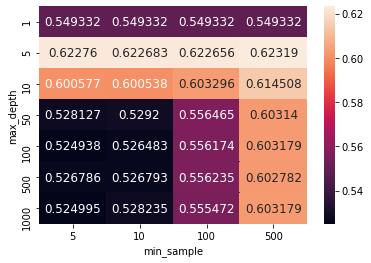

In [263]:
results = pd.DataFrame.from_dict(model.cv_results_)
max_depths = []
min_samples = []
mean_cv_scores = []
mean_train_scores = []
for p in zip(results['params'], results['mean_test_score'], results['mean_train_score']):
    param_dict, score_test, score_train = p
    max_depth,min_sample = param_dict.values()
    max_depths.append(max_depth)
    min_samples.append(min_sample)
    mean_cv_scores.append(score_test)
    mean_train_scores.append(score_train)

df = pd.DataFrame({'max_depth':max_depths,'min_sample':min_samples,'mean_test_score':mean_cv_scores})
pivot = df.pivot(index = "max_depth", columns = "min_sample", values="mean_test_score")
sns.heatmap(pivot,annot=True, annot_kws={"size": 12}, fmt='g')

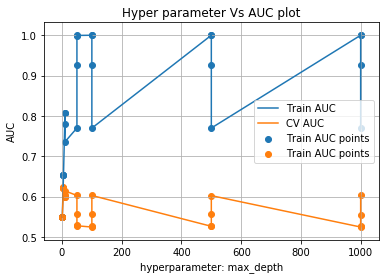

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.529969      0.239466         0.804597        0.001948   
1      11.232384      0.225829         0.803551        0.008368   
2      11.421203      0.032625         0.805257        0.004952   
3      11.413182      0.086289         0.810021        0.005595   
4      42.424900      0.206719         0.802968        0.002618   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                     100   
3               1                     500   
4               5                       5   

                                       params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 5}           0.551973   
1   {'max_depth': 1, 'min_samples_split': 10}           0.551973   
2  {'max_depth': 1, 'min_samples_split': 100}           0.551973   
3  {'max_depth': 1, 'min_samples_split': 500}           0.551973   
4    {'max_depth': 5, 'min_samples_split': 5}           0.618858   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.546615           0.549407         0.549332        0.002188   
1           0.546615           0.549407         0.549332        0.002188   
2           0.546615           0.549407         0.549332        0.002188   
3           0.546615           0.549407         0.549332        0.002188   
4           0.623307           0.626115         0.622760        0.002988   

   rank_test_score  split0_train_score  split1_train_score  \
0               17            0.548408            0.550199   
1               17            0.548408            0.550199   
2               17            0.548408            0.550199   
3               17            0.548408            0.550199   
4                2            0.655529            0.656581   

   split2_train_score  mean_train_score  std_train_score  
0            0.549691          0.549433         0.000754  
1            0.549691          0.549433         0.000754  
2            0.549691          0.549433         0.000754  
3            0.549691          0.549433         0.000754  
4            0.651069          0.654393         0.002389

In [264]:
auc_df_train = pd.DataFrame({'max_depth':max_depths,'train_auc':mean_train_scores})
auc_df_train = auc_df_train.sort_values(by='max_depth')

auc_df_cv = pd.DataFrame({'max_depth':max_depths,'cv_auc':mean_cv_scores})
auc_df_cv = auc_df_cv.sort_values(by='max_depth')

plt.plot(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC')
plt.plot(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='CV AUC')

plt.scatter(auc_df_train['max_depth'], auc_df_train['train_auc'], label='Train AUC points')
plt.scatter(auc_df_cv['max_depth'], auc_df_cv['cv_auc'], label='Train AUC points')


plt.legend()
plt.xlabel("hyperparameter: max_depth")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [265]:
model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

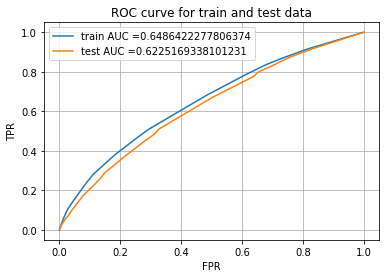

In [266]:
dt_tfidf_w2v = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=500)
dt_tfidf_w2v.fit(X_train_tfidf_w2v,Y_train)

y_train_pred = dt_tfidf_w2v.predict_proba(X_train_tfidf_w2v)
y_test_pred = dt_tfidf_w2v.predict_proba(X_test_tfidf_w2v)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Confusion Matrix**

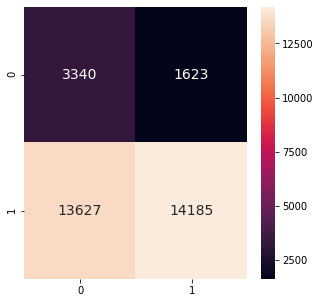

In [267]:
y_test_predict = dt_tfidf_w2v.predict(X_test_tfidf_w2v)

results = confusion_matrix(Y_test, y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')

**Analysis of False Positive data**

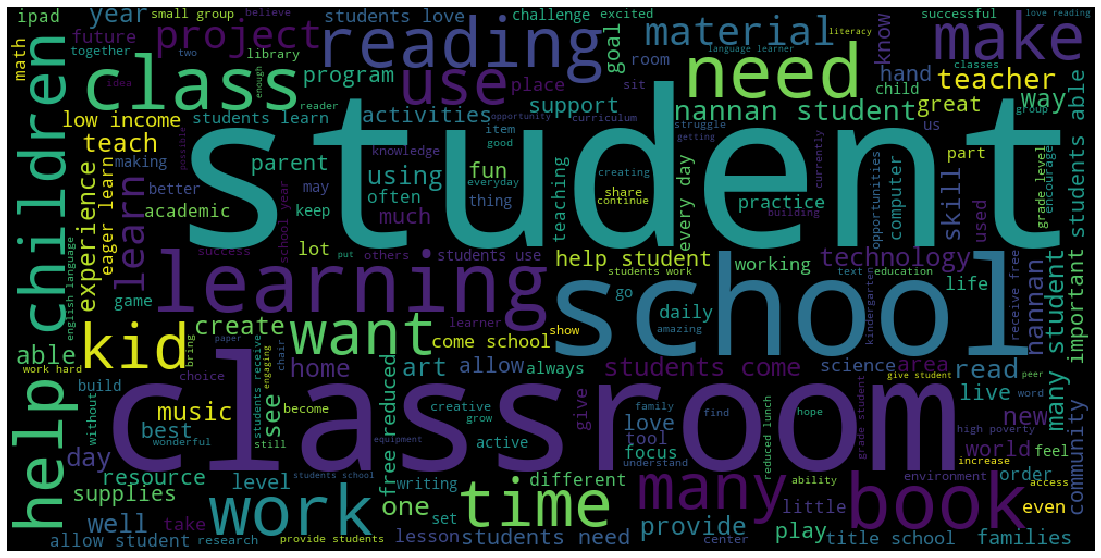

In [268]:
fp_df_tf_idf_w2v = X_test.reset_index(drop=True)
fp_df_tf_idf_w2v['y'] = Y_test.values
fp_df_tf_idf_w2v['y_hat'] = y_test_predict
fp_df_tf_idf_w2v = fp_df_tf_idf_w2v.loc[(fp_df_tf_idf_w2v['y']==0) & (fp_df_tf_idf_w2v['y_hat']==1)]

unique_string=(" ").join(fp_df_tf_idf_w2v['clean_essay'].values)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

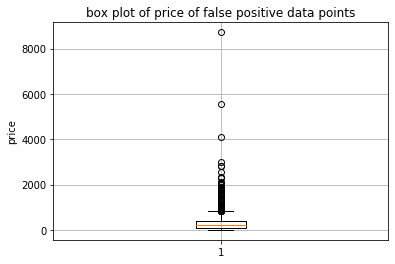

In [269]:
plt.boxplot(fp_df_tf_idf_w2v['price'])
plt.grid()
plt.ylabel("price")
plt.title("box plot of price of false positive data points")
plt.show()

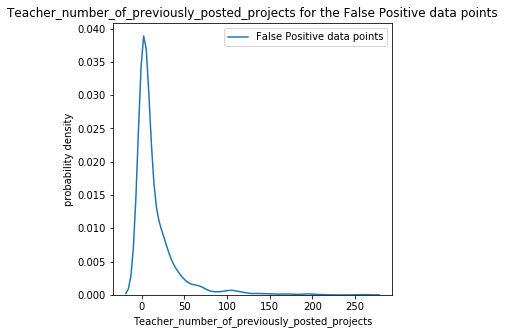

In [270]:
plt.figure(figsize=(5,5))
sns.distplot(fp_df_tf_idf_w2v['teacher_number_of_previously_posted_projects'].values, hist=False, label="False Positive data points")
plt.title('Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability density')
plt.legend()
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

**Training the decision tree classifier to full depth so that we can obtain important features**

In [331]:
dt_tfidf_fimp = DecisionTreeClassifier()
dt_tfidf_fimp.fit(X_train_tfidf,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [365]:
fimp = dt_tfidf_fimp.tree_.compute_feature_importances(normalize=False)
df = pd.DataFrame(fimp)
df = np.transpose(df)
df

0        1     2     3         4         5     6     7     8     9     ...  \
0   0.0  0.00007   0.0   0.0  0.000081  0.000013   0.0   0.0   0.0   0.0  ...   

   9929  9930      9931  9932      9933  9934  9935      9936  9937  9938  
0   0.0   0.0  0.000026   0.0  0.000026   0.0   0.0  0.000025   0.0   0.0  

[1 rows x 9939 columns]

**Remove all the features with importance zero**

In [366]:
important_features = []

for i in range(df.shape[1]):
    s = df[i].sum()
    if s>0:
        important_features.append(i)

**Create new datasets with only relevant features**

In [382]:
tfidf_df_train = pd.DataFrame(X_train_tfidf.todense())
tfidf_df_test = pd.DataFrame(X_test_tfidf.todense())
tfidf_df_train = tfidf_df_train[important_features]
tfidf_df_test = tfidf_df_test[important_features]

**We were able to find only 3507 important features**

In [383]:
tfidf_df_train.shape

(76473, 3507)

**Training a MultinomialNB classifier on the transformed dataset**

In [397]:
multinomial_nb = MultinomialNB(class_prior=[0.5,0.5])
#Set parameters for grid search
parameters = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]}
# Use GridSearchCV to search for the optimal value of alpha
# Here, we are using roc_auc as our scoring metric since we have imbalanced dataset
clf = GridSearchCV(estimator = multinomial_nb, param_grid = parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=8, verbose = True)
#pass X_train and Y_train as data to search alpha. Here grid search will automatically split the data
#into stratified samples.
clf.fit(tfidf_df_train.values, Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   51.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5], fit_prior=True),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

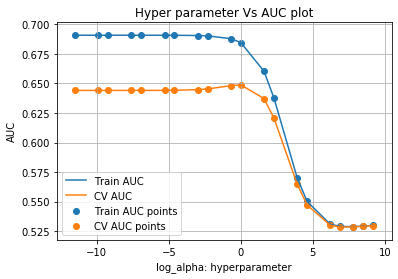

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       6.711862      0.127199         0.312209        0.019024       1e-05   
1       7.297321      0.367258         0.325055        0.031615       5e-05   
2       6.618534      0.139563         0.319039        0.083929      0.0001   
3       7.379565      0.661302         0.265951        0.015358      0.0005   
4       7.193194      0.122408         0.289029        0.025618       0.001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}           0.647354           0.639559           0.645477   
1   {'alpha': 5e-05}           0.647355           0.639559           0.645478   
2  {'alpha': 0.0001}           0.647355           0.639560           0.645478   
3  {'alpha': 0.0005}           0.647359           0.639562           0.645482   
4   {'alpha': 0.001}           0.647362           0.639565           0.645487   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.644130        0.003322               11            0.690667   
1         0.644130        0.003322               10            0.690666   
2         0.644131        0.003322                9            0.690666   
3         0.644134        0.003323                8            0.690665   
4         0.644138        0.003323                7            0.690663   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.689053            0.692882          0.690867          0.00157  
1            0.689053            0.692882          0.690867          0.00157  
2            0.689052            0.692882          0.690867          0.00157  
3            0.689051            0.692881          0.690866          0.00157  
4            0.689050            0.692879          0.690864          0.00157

In [398]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alphas =  results['param_alpha']

log_alphas = [np.log(x) for x in alphas]

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log_alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [399]:
clf.best_estimator_

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)

**Training NB on the best value of alpha = 1**

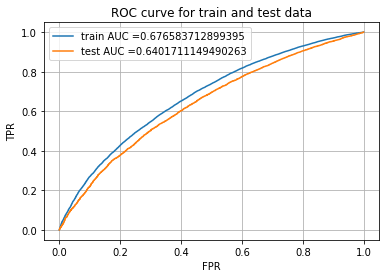

In [400]:
multinomial_nb = MultinomialNB(alpha=1,class_prior=[0.5,0.5])
multinomial_nb.fit(tfidf_df_train.values, Y_train)

y_train_pred = multinomial_nb.predict_proba(tfidf_df_train.values)
y_test_pred = multinomial_nb.predict_proba(tfidf_df_test.values)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Confusion Matrix**

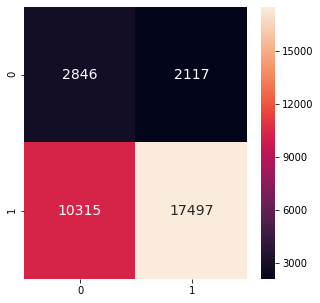

In [401]:
y_test_predict = multinomial_nb.predict(tfidf_df_test.values)

results = confusion_matrix(Y_test, y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')

<h1>3. Conclusion</h1>

In [408]:
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "max_depth:(DT)/aplha(NB)","min_samples_split","AUC"]

x.add_row(["BOW", "Decision Tree", 10, 500,0.64])
x.add_row(["TFIDF", "Decision Tree", 10,50,0.64])
x.add_row(["W2Vec", "Decision Tree", 5,10,0.62])
x.add_row(["TFIDF-W2Vec", "Decision Tree",5, 100,0.62])
x.add_row(["Best Features TFIDF", "MultiNomial-NB","alpha=1","N.A", 0.64])
print(x)

+---------------------+----------------+--------------------------+-------------------+------+
|      Vectorizer     |     Model      | max_depth:(DT)/aplha(NB) | min_samples_split | AUC  |
+---------------------+----------------+--------------------------+-------------------+------+
|         BOW         | Decision Tree  |            10            |        500        | 0.64 |
|        TFIDF        | Decision Tree  |            10            |         50        | 0.64 |
|        W2Vec        | Decision Tree  |            5             |         10        | 0.62 |
|     TFIDF-W2Vec     | Decision Tree  |            5             |        100        | 0.62 |
| Best Features TFIDF | MultiNomial-NB |         alpha=1          |        N.A        | 0.64 |
+---------------------+----------------+--------------------------+-------------------+------+
